In [3]:
# Mengimpor Library
import pandas as pd
import numpy as np

In [4]:
# Memuat dataset 'movie_metadata.tsv'
movie_metadata = pd.read_csv('movie_metadata.tsv', sep='\t', header=None)

In [5]:
# Memuat dataset 'plot_summaries.tsv'
plot_summary = pd.read_csv('plot_summaries.tsv', sep='\t', header=None)

## **Mengeksplorasi dataset**

In [6]:
movie_metadata.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [7]:
movie_metadata.shape

(81741, 9)

In [8]:
movie_metadata.dtypes

0      int64
1     object
2     object
3     object
4    float64
5    float64
6     object
7     object
8     object
dtype: object

In [9]:
plot_summary.head()

,0,1
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [10]:
plot_summary.shape

(42303, 2)

In [12]:
plot_summary.dtypes

0     int64
1    object
dtype: object

## **Pembersihan Data**
• *Mengganti nama kolom yang diperlukan dari dataframe 'movie_metadata' dan 'plot_summary' <br/>*
• *Menggabungkan dataframe 'movie_metadata' dan 'plot_summary' menjadi satu <br/>*
• *Membersihkan kolom 'genre'<br/>*
• *Menghapus baris dengan 0 tag genre<br/>*

In [13]:
# Mengganti nama kolom pada movie_metadata
movie_metadata.columns = ["movie_id", 1, "movie_name", 3, 4, 5, 6, 7, "genre"]

In [14]:
# Mengganti nama kolom pada plot_summary
plot_summary.columns = ["movie_id", "plot"]

In [15]:
# Menggabungkan kedua dataframe
df = pd.merge(movie_metadata[['movie_id', 'movie_name', 'genre']], plot_summary, on='movie_id')

In [16]:
df.shape

(42204, 4)

In [17]:
df.head()

,movie_id,movie_name,genre,plot
0,975900,Ghosts of Mars,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th..."
1,9363483,White Of The Eye,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
2,261236,A Woman in Flames,"{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."
3,18998739,The Sorcerer's Apprentice,"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns..."
4,6631279,Little city,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a..."


In [18]:
# Membersihkan kolom genre
df['genre'][0]

'{"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}'

In [19]:
import json
json.loads(df['genre'][0]).values()

dict_values(['Thriller', 'Science Fiction', 'Horror', 'Adventure', 'Supernatural', 'Action', 'Space western'])

In [20]:
df['genre'] = df['genre'].apply(lambda x: list(json.loads(x).values()))
df.head()

,movie_id,movie_name,genre,plot
0,975900,Ghosts of Mars,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,9363483,White Of The Eye,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
2,261236,A Woman in Flames,[Drama],"Eva, an upper class housewife, becomes frustra..."
3,18998739,The Sorcerer's Apprentice,"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns..."
4,6631279,Little city,"[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a..."


In [21]:
# Menghapus baris dengan 0 tag genre
print("Sebelum menghapus baris: {}".format(df.shape))
df = df[df['genre'].apply(lambda x: False if len(x)==0 else True)]
print("Setelah menghapus baris: {}".format(df.shape))

Sebelum menghapus baris: (42204, 4)
Setelah menghapus baris: (41793, 4)


## **Visualisasi Data**
• *Berbagai jenis genre yang berbeda*<br/>

In [22]:
# Mengimpor Library
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Menghitung genre unik
all_genre = list()
temp = list()

def total_unique_genre(x):
    global all_genre, temp
    x = x.reset_index()
    for i in range(0, x.shape[0]):
        temp = temp + x.iloc[i, 1]

    all_genre = set(temp)
    return len(all_genre)

print('Jumlah total genre unik adalah: {}'.format(total_unique_genre(df['genre'])))

Jumlah total genre unik adalah: 363


In [24]:
# Menggunakan FreqDist untuk menghitung frekuensi semua genre dalam dataset
from nltk.probability import FreqDist
temp_with_count = FreqDist(temp)

# Membuat dataframe dari genre_count
df_genre_count = pd.DataFrame({'Genre': list(temp_with_count.keys()),
                               'Count': list(temp_with_count.values())})

Text(0, 0.5, 'Genres')

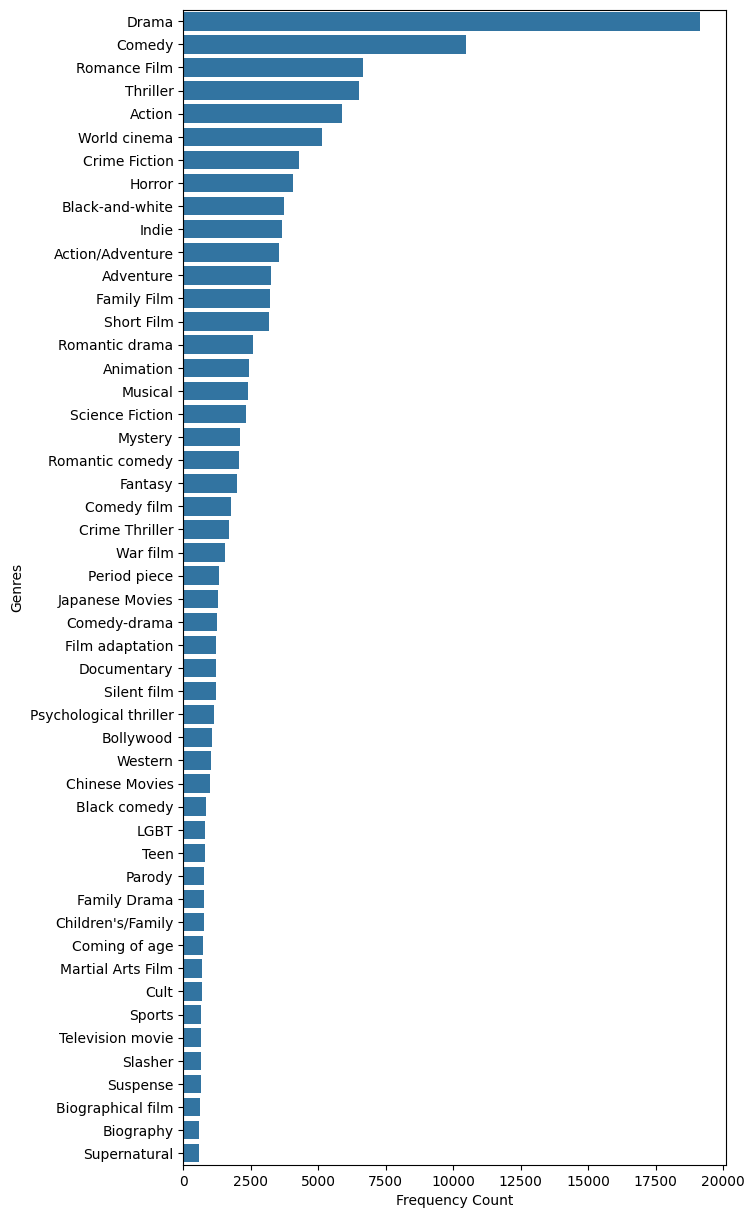

In [25]:
# Memplot 50 genre teratas
genre_top_50 = df_genre_count.sort_values(by=['Count'], ascending=False).iloc[0:50, :]
plt.figure(figsize=(7,15))
sns.barplot(x='Count', y='Genre', data=genre_top_50)
plt.xlabel('Frequency Count')
plt.ylabel('Genres')

## **Pemrosesan Data**
• *Membersihkan plot summary*<br/>
• *Menghapus stopwords*<br/>
• *Memotong plot summary*<br/>
• *Mengonversi Genre menjadi variabel Target menggunakan MultiLabelBinarizer*<br/>
• *Membagi dataset menjadi set train and set test*<br/>
• *Membuat fitur dari corpus menggunakan TfidfVectorizer*<br/>

In [27]:
# Mengimpor Library
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def plot_clean(text):
    text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=text)
    text = text.lower()
    text = ' '.join(text.split())
    return text

In [29]:
df['clean_plot'] = df['plot'].apply(lambda x: plot_clean(x))
df[['plot', 'clean_plot']].head()

,plot,clean_plot
0,"Set in the second half of the 22nd century, th...",set in the second half of the nd century the f...
1,A series of murders of rich young women throug...,a series of murders of rich young women throug...
2,"Eva, an upper class housewife, becomes frustra...",eva an upper class housewife becomes frustrate...
3,"Every hundred years, the evil Morgana returns...",every hundred years the evil morgana returns t...
4,"Adam, a San Francisco-based artist who works a...",adam a san francisco based artist who works as...


In [32]:
# Menghapus stopwords dari 'clean_plot'
stopwords_set = set(stopwords.words('english'))

def plot_stopwords(text):
    words = text.split()
    words = [word for word in words if not word in stopwords_set]
    text = ' '.join(words)
    return text

In [33]:
df['clean_noStopword_plot'] = df['clean_plot'].apply(lambda x: plot_stopwords(x))
df[['clean_plot', 'clean_noStopword_plot']].head()

,clean_plot,clean_noStopword_plot
0,set in the second half of the nd century the f...,set second half nd century film depicts mars p...
1,a series of murders of rich young women throug...,series murders rich young women throughout ari...
2,eva an upper class housewife becomes frustrate...,eva upper class housewife becomes frustrated l...
3,every hundred years the evil morgana returns t...,every hundred years evil morgana returns claim...
4,adam a san francisco based artist who works as...,adam san francisco based artist works cab driv...


In [34]:
# Memotong kata-kata dari 'clean_noStopword_plot'
ps = PorterStemmer()

def plot_stemming(text):
    words = text.split()
    words = [ps.stem(word) for word in words]
    text = ' '.join(words)
    return text

In [35]:
df['clean_noStopword_stem_plot'] = df['clean_noStopword_plot'].apply(lambda x: plot_stemming(x))
df[['clean_noStopword_plot', 'clean_noStopword_stem_plot']].head()

,clean_noStopword_plot,clean_noStopword_stem_plot
0,set second half nd century film depicts mars p...,set second half nd centuri film depict mar pla...
1,series murders rich young women throughout ari...,seri murder rich young women throughout arizon...
2,eva upper class housewife becomes frustrated l...,eva upper class housewif becom frustrat leav a...
3,every hundred years evil morgana returns claim...,everi hundr year evil morgana return claim fin...
4,adam san francisco based artist works cab driv...,adam san francisco base artist work cab driver...


In [36]:
# Mengonversi genre menjadi variabel target menggunakan MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genre'])

In [37]:
X = df['clean_noStopword_stem_plot']

In [38]:
# Membagi dataset menjadi set train dan set test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [39]:
# Membuat fitur independen menggunkan TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.8, max_features=10000)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

## **Pembuatan Model**

In [40]:
# Logistic Regression Model
# Mengimpor Library
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [41]:
lr = LogisticRegression()
ovr_clf = OneVsRestClassifier(lr)

In [42]:
# Model yang sesuai pada data train
ovr_clf.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 243 is present in all training examples.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression())

In [43]:
# Memprediksi nilai untuk set test
y_pred_ovr = ovr_clf.predict(X_test)
y_pred_ovr[5]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
mlb.inverse_transform(y_pred_ovr)[5]

('Drama',)

In [45]:
# Evaluasi Model
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_ovr, average="micro"))

0.32451543979244035


In [46]:
# Mengubah probabilitas ambang batas dari 0,5 menjadi 0,3
y_pred_prob = ovr_clf.predict_proba(X_test)
y_pred_new = (y_pred_prob >= 0.2).astype(int)

In [47]:
f1_score(y_test, y_pred_new, average="micro")

0.4735889529427537

## **Prediksi**

In [48]:
# Membuat Fungsi
def predict_genre_tags(text):
    text = plot_clean(text)
    text = plot_stopwords(text)
    text = plot_stemming(text)
    text_vec = tfidf.transform([text])
    text_pred = ovr_clf.predict(text_vec)
    return mlb.inverse_transform(text_pred)

In [50]:
# Prediksi 1
movie_name = 'Titanic (1998)'
plot_summary = "After winning a trip on the RMS Titanic during a dockside card game, American Jack Dawson spots the society girl Rose DeWitt Bukater who is on her way to Philadelphia to marry her rich snob fiancé Caledon Hockley. Rose feels helplessly trapped by her situation and makes her way to the aft deck and thinks of suicide until she is rescued by Jack. Cal is therefore obliged to invite Jack to dine at their first-class table where he suffers through the slights of his snobbish hosts. In return, he spirits Rose off to third-class for an evening of dancing, giving her the time of her life. Deciding to forsake her intended future all together, Rose asks Jack, who has made his living making sketches on the streets of Paris, to draw her in the nude wearing the invaluable blue diamond Cal has given her. Cal finds out and has Jack locked away. Soon afterwards, the ship hits an iceberg and Rose must find Jack while both must run from Cal even as the ship sinks deeper into the freezing water."
actual_genre = ['Drama', 'Romance']
predicted_genre = predict_genre_tags(plot_summary)
print('Movie: {}\nPredicted genres: {}\nActual genres: {}'.format(movie_name, predicted_genre[0], actual_genre))

Movie: Titanic (1998)
Predicted genres: ('Drama',)
Actual genres: ['Drama', 'Romance']


In [51]:
# Prediksi 2
movie_name = 'Avatar (2009)'
plot_summary = "On the lush alien world of Pandora live the Na'vi, beings who appear primitive but are highly evolved. Because the planet's environment is poisonous, human/Na'vi hybrids, called Avatars, must link to human minds to allow for free movement on Pandora. Jake Sully (Sam Worthington), a paralyzed former Marine, becomes mobile again through one such Avatar and falls in love with a Na'vi woman (Zoe Saldana). As a bond with her grows, he is drawn into a battle for the survival of her world."
actual_genre = ['Action', 'Adventure', 'Fantasy']
predicted_genre = predict_genre_tags(plot_summary)
print('Movie: {}\nPredicted genres: {}\nActual genres: {}'.format(movie_name, predicted_genre[0], actual_genre))

Movie: Avatar (2009)
Predicted genres: ()
Actual genres: ['Action', 'Adventure', 'Fantasy']


In [52]:
# Prediksi 3
movie_name = 'Conjuring (2013)'
plot_summary = "In 1971, Carolyn and Roger Perron move their family into a dilapidated Rhode Island farm house and soon strange things start happening around it with escalating nightmarish terror. In desperation, Carolyn contacts the noted paranormal investigators, Ed and Lorraine Warren, to examine the house. What the Warrens discover is a whole area steeped in a satanic haunting that is now targeting the Perron family wherever they go. To stop this evil, the Warrens will have to call upon all their skills and spiritual strength to defeat this spectral menace at its source that threatens to destroy everyone involved."
actual_genre = ['Horror', 'Thriller']
predicted_genre = predict_genre_tags(plot_summary)
print('Movie: {}\nPredicted genres: {}\nActual genres: {}'.format(movie_name, predicted_genre[0], actual_genre))

Movie: Conjuring (2013)
Predicted genres: ('Horror',)
Actual genres: ['Horror', 'Thriller']


In [53]:
# Prediksi 4
movie_name = 'The Hangover (2009)'
plot_summary = "Three buddies wake up from a bachelor party in Las Vegas, with no memory of the previous night and the bachelor missing. They make their way around the city in order to find their friend before his wedding."
actual_genre = ['Comedy']
predicted_genre = predict_genre_tags(plot_summary)
print('Movie: {}\nPredicted genres: {}\nActual genres: {}'.format(movie_name, predicted_genre[0], actual_genre))

Movie: The Hangover (2009)
Predicted genres: ('Comedy', 'Romance Film')
Actual genres: ['Comedy']


In [54]:
# Prediksi 5
movie_name = 'La La Land (2016)'
plot_summary = "The story of aspiring actress Mia and dedicated jazz musician Sebastian, who struggle to make ends meet while pursuing their dreams in a city known for destroying hopes and breaking hearts. With modern-day Los Angeles as the backdrop, this musical about everyday life explores what more important: a once-in-a-lifetime love or the spotlight."
actual_genre = ['Cpmedy', 'Drama', 'Music']
predicted_genre = predict_genre_tags(plot_summary)
print('Movie: {}\nPredicted genres: {}\nActual genres: {}'.format(movie_name, predicted_genre[0], actual_genre))

Movie: La La Land (2016)
Predicted genres: ('Drama',)
Actual genres: ['Cpmedy', 'Drama', 'Music']
